In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from dataloader import getDataloaders, getBalancedDataloaders
from model_factory import ResNet101
from experiment import train_model, test_model, train_model_with_balanced_loaders
import json



batch_size = 16
num_epochs = 8
lr = 0.0001
weight_decay = 1e-1
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
class_size = 300

    
catalogue_csv_path = '../../../full_data/expanded_catalogue.csv'
root_dir_images='../../../full_data/segmented_images/'
train_val_test_split_path = "../../data_split/train_val_test_split.json"
batch_size = 16


In [2]:
#balanced data experiment
(train_dataset_loaders, val_dataset_loader, test_dataset_loader) = getBalancedDataloaders(catalogue_csv_path, root_dir_images, train_val_test_split_path, batch_size, class_size, 10)
print(len(train_dataset_loaders), len(train_dataset_loaders[0]) ,len(val_dataset_loader), len(test_dataset_loader))

/trunk/shared/cuneiform/CuneiformDating/image_classification/newExperiments/dataloader.py:27: DtypeWarning: Columns (4,5,45,46,62,64,68,69,70,71,73,76,77,78,79,80,81,83,84,88,90,91,93,94) have mixed types. Specify dtype option on import or set low_memory=False.
  self.catalogue = pd.read_csv(csv_file)
/trunk/shared/cuneiform/CuneiformDating/image_classification/newExperiments/dataloader.py:27: DtypeWarning: Columns (4,5,45,46,62,64,68,69,70,71,73,76,77,78,79,80,81,83,84,88,90,91,93,94) have mixed types. Specify dtype option on import or set low_memory=False.
  self.catalogue = pd.read_csv(csv_file)
/trunk/shared/cuneiform/CuneiformDating/image_classification/newExperiments/dataloader.py:27: DtypeWarning: Columns (4,5,45,46,62,64,68,69,70,71,73,76,77,78,79,80,81,83,84,88,90,91,93,94) have mixed types. Specify dtype option on import or set low_memory=False.
  self.catalogue = pd.read_csv(csv_file)
/trunk/shared/cuneiform/CuneiformDating/image_classification/newExperiments/dataloader.py:2

10 338 17 17


In [3]:
resnet101_model = ResNet101().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(resnet101_model.parameters(), lr=lr, weight_decay=weight_decay)

resnet101_model = train_model_with_balanced_loaders(resnet101_model, train_dataset_loaders, val_dataset_loader, optimizer, num_epochs, criterion, device)
test_model(resnet101_model, test_dataset_loader, optimizer, criterion, device)

Epoch 1/8
----------------------------------------------------------------------------------------------------


338it [00:53,  6.35it/s]


Train Loss: 37.5158 Train Accuracy:  0.2896296296296296


17it [00:01, 12.50it/s]


Val Loss: 28.4444 Val Accuracy:  0.4740740740740741
Epoch 2/8
----------------------------------------------------------------------------------------------------


338it [00:53,  6.36it/s]


Train Loss: 28.0658 Train Accuracy:  0.46796296296296297


17it [00:01, 12.46it/s]


Val Loss: 24.2889 Val Accuracy:  0.5259259259259259
Epoch 3/8
----------------------------------------------------------------------------------------------------


338it [00:54,  6.23it/s]


Train Loss: 23.4297 Train Accuracy:  0.5561111111111111


17it [00:01, 12.64it/s]


Val Loss: 24.4679 Val Accuracy:  0.5518518518518518
Epoch 4/8
----------------------------------------------------------------------------------------------------


338it [00:54,  6.21it/s]


Train Loss: 20.0880 Train Accuracy:  0.6177777777777778


17it [00:01, 12.48it/s]


Val Loss: 20.6090 Val Accuracy:  0.6259259259259259
Epoch 5/8
----------------------------------------------------------------------------------------------------


338it [00:54,  6.19it/s]


Train Loss: 17.9897 Train Accuracy:  0.647962962962963


17it [00:01, 12.26it/s]


Val Loss: 21.9503 Val Accuracy:  0.6481481481481481
Epoch 6/8
----------------------------------------------------------------------------------------------------


338it [00:54,  6.24it/s]


Train Loss: 16.2687 Train Accuracy:  0.6824074074074075


17it [00:01, 12.06it/s]


Val Loss: 20.3445 Val Accuracy:  0.6259259259259259
Epoch 7/8
----------------------------------------------------------------------------------------------------


338it [00:54,  6.25it/s]


Train Loss: 15.3552 Train Accuracy:  0.7096296296296296


17it [00:01, 12.94it/s]


Val Loss: 17.0279 Val Accuracy:  0.674074074074074
Epoch 8/8
----------------------------------------------------------------------------------------------------


338it [00:53,  6.36it/s]


Train Loss: 14.0507 Train Accuracy:  0.7272222222222222


17it [00:01, 13.07it/s]


Val Loss: 22.0652 Val Accuracy:  0.6148148148148148


17it [00:01, 12.89it/s]

Test Loss: 26.3673 Test Accuracy:  0.6148148148148148


In [4]:
resnet101_model = ResNet101().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(resnet101_model.parameters(), lr=lr, weight_decay=weight_decay)

resnet101_model = train_model_with_balanced_loaders(resnet101_model, train_dataset_loaders, val_dataset_loader, optimizer, num_epochs, criterion, device)
test_model(resnet101_model, test_dataset_loader, optimizer, criterion, device)

Epoch 1/20
----------------------------------------------------------------------------------------------------


338it [00:52,  6.49it/s]


Train Loss: 36.8681 Train Accuracy:  0.3025925925925926


17it [00:01, 13.01it/s]


Val Loss: 26.0157 Val Accuracy:  0.4888888888888889
Epoch 2/20
----------------------------------------------------------------------------------------------------


338it [01:26,  3.92it/s]


Train Loss: 26.8474 Train Accuracy:  0.49648148148148147


17it [00:01, 13.15it/s]


Val Loss: 23.1999 Val Accuracy:  0.5592592592592592
Epoch 3/20
----------------------------------------------------------------------------------------------------


338it [01:20,  4.19it/s]


Train Loss: 21.8184 Train Accuracy:  0.582037037037037


17it [00:01, 13.10it/s]


Val Loss: 22.4939 Val Accuracy:  0.5555555555555556
Epoch 4/20
----------------------------------------------------------------------------------------------------


338it [01:19,  4.27it/s]


Train Loss: 19.3392 Train Accuracy:  0.6270370370370371


17it [00:01, 13.00it/s]


Val Loss: 20.0146 Val Accuracy:  0.6
Epoch 5/20
----------------------------------------------------------------------------------------------------


338it [01:17,  4.37it/s]


Train Loss: 17.4133 Train Accuracy:  0.6722222222222223


17it [00:01, 13.02it/s]


Val Loss: 18.0312 Val Accuracy:  0.6148148148148148
Epoch 6/20
----------------------------------------------------------------------------------------------------


338it [01:12,  4.67it/s]


Train Loss: 15.3985 Train Accuracy:  0.6988888888888889


17it [00:01, 12.81it/s]


Val Loss: 17.4204 Val Accuracy:  0.6703703703703704
Epoch 7/20
----------------------------------------------------------------------------------------------------


338it [01:08,  4.96it/s]


Train Loss: 14.7687 Train Accuracy:  0.707962962962963


17it [00:01, 12.86it/s]


Val Loss: 17.5262 Val Accuracy:  0.6851851851851852
Epoch 8/20
----------------------------------------------------------------------------------------------------


338it [01:06,  5.08it/s]


Train Loss: 13.6931 Train Accuracy:  0.7311111111111112


17it [00:01, 13.10it/s]


Val Loss: 17.5024 Val Accuracy:  0.6777777777777778
Epoch 9/20
----------------------------------------------------------------------------------------------------


338it [01:05,  5.19it/s]


Train Loss: 13.1703 Train Accuracy:  0.7424074074074074


17it [00:01, 13.01it/s]


Val Loss: 17.9016 Val Accuracy:  0.662962962962963
Epoch 10/20
----------------------------------------------------------------------------------------------------


277it [00:53,  5.19it/s]


FileNotFoundError: [Errno 2] No such file or directory: '../../../full_data/segmented_images/P105907.jpg'

In [6]:
test_model(resnet101_model, test_dataset_loader, optimizer, criterion)

17it [00:01, 10.43it/s]

Test Loss: 24.8103 Test Accuracy:  0.5666666666666667


printing confusion matrix


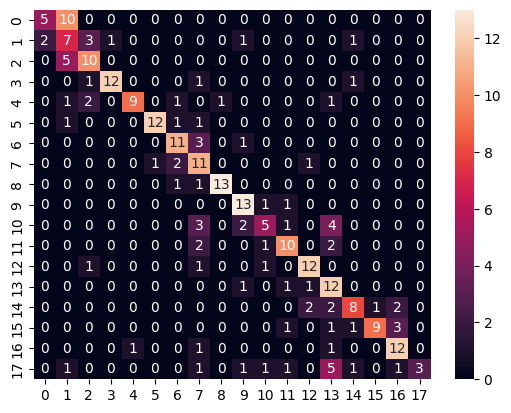

In [2]:
from utils import *
analyze_predictions("results/2023-07-07 08:53:11.303740/test_predictions.json")